## Ce projet analyse un jeu de données de 1000 transactions (données synthétiques générées via Python) pour simuler un environnement réaliste.

In [137]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Configuration de la simulation
nb_lignes = 1000
produits = {
    'Ecran': 250,    # Nom : Prix unitaire moyen
    'Clavier': 40,
    'Souris': 25,
    'Portable': 800,
    'Casque': 60
}
villes = ['Paris', 'Lyon', 'Marseille', 'Bordeaux', 'Lille']

data = []

# Génération des données
for _ in range(nb_lignes):
    # Date aléatoire en 2024
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 12, 31)
    random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
    
    # Choix aléatoire du produit et de la ville
    produit_nom = random.choice(list(produits.keys()))
    ville = random.choice(villes)
    
    # Quantité (entre 1 et 10) et prix (prix de base +/- variation de 10%)
    quantite = random.randint(1, 10)
    prix_base = produits[produit_nom]
    prix_final = round(prix_base * random.uniform(0.9, 1.1), 2)
    
    data.append([random_date, produit_nom, quantite, prix_final, ville])

# Création du DataFrame
df = pd.DataFrame(data, columns=['date', 'produit', 'quantite', 'prix', 'ville'])

# Affichage des premières lignes pour vérifier
print("Nouvelles données générées :")
display(df.head())

# Si tu veux sauvegarder ce fichier pour le garder
df.to_csv('data/ventes.csv', index=False)

Nouvelles données générées :


,date,produit,quantite,prix,ville
0,2024-12-12,Portable,9,785.80,Lille
1,2024-09-21,Ecran,5,270.66,Bordeaux
2,2024-05-01,Portable,7,822.99,Paris
3,2024-07-14,Casque,2,59.53,Paris
4,2024-05-23,Clavier,8,43.08,Bordeaux


In [138]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1000 non-null   datetime64[ns]
 1   produit   1000 non-null   object        
 2   quantite  1000 non-null   int64         
 3   prix      1000 non-null   float64       
 4   ville     1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


,date,quantite,prix
count,1000,1000.000000,1000.000000
mean,2024-06-28 13:13:26.400000,5.237000,244.284210
min,2024-01-01 00:00:00,1.000000,22.510000
25%,2024-03-27 18:00:00,3.000000,37.865000
50%,2024-07-01 00:00:00,5.000000,60.740000
75%,2024-09-29 06:00:00,8.000000,265.797500
max,2024-12-31 00:00:00,10.000000,879.010000
std,NaN,2.893303,299.995854


In [139]:
df["date"] = pd.to_datetime(df["date"])

df["chiffre_affaires"] = df["prix"] * df["quantite"]

df


,date,produit,quantite,prix,ville,chiffre_affaires
0,2024-12-12,Portable,9,785.80,Lille,7072.20
1,2024-09-21,Ecran,5,270.66,Bordeaux,1353.30
2,2024-05-01,Portable,7,822.99,Paris,5760.93
3,2024-07-14,Casque,2,59.53,Paris,119.06
4,2024-05-23,Clavier,8,43.08,Bordeaux,344.64
...,...,...,...,...,...,...
995,2024-03-27,Ecran,6,243.07,Lille,1458.42
996,2024-09-12,Souris,10,24.20,Bordeaux,242.00
997,2024-12-07,Casque,5,57.79,Lyon,288.95
998,2024-07-23,Casque,6,65.06,Marseille,390.36


In [140]:
ca_total = df["chiffre_affaires"].sum()

ca_total

np.float64(1282598.2)

## Chiffre d'affaire total
- Le chiifre d'affaire total est de: 1282598.2 euros


In [141]:
ca_produit = df.groupby("produit")["chiffre_affaires"].sum()
ca_produit

produit
Casque       59941.20
Clavier      40120.91
Ecran       246828.15
Portable    908104.19
Souris       27603.75
Name: chiffre_affaires, dtype: float64

In [142]:
ca_ville = df.groupby("ville")["chiffre_affaires"].sum()
ca_ville

ville
Bordeaux     223657.30
Lille        277513.54
Lyon         274375.25
Marseille    220453.37
Paris        286598.74
Name: chiffre_affaires, dtype: float64

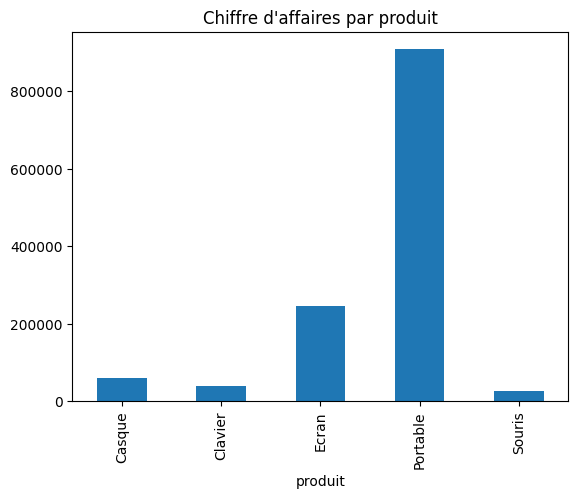

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

ca_produit.plot(kind="bar", title="Chiffre d'affaires par produit")
plt.show()

les écrans sont les plus vendus comme produit

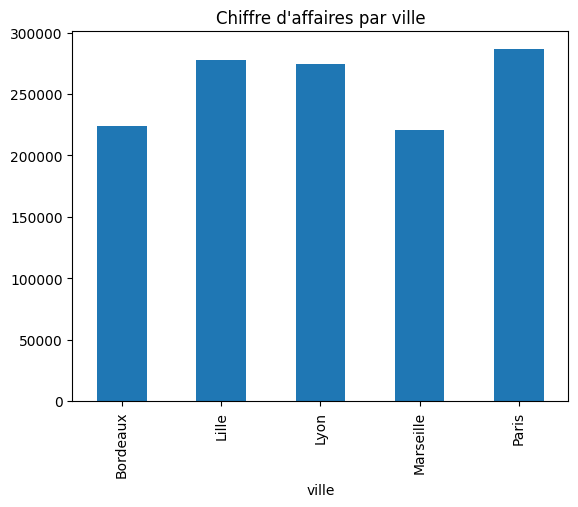

In [144]:
ca_ville.plot(kind="bar", title="Chiffre d'affaires par ville")
plt.show()

Paris, Lyon et Lille sont les villes qui génerent le plus de chiffre d'affaires.

In [145]:
df["mois"] = df["date"].dt.to_period("M")
ca_mois = df.groupby("mois")["chiffre_affaires"].sum()
ca_mois

mois
2024-01     93735.88
2024-02     93116.76
2024-03    119758.07
2024-04     96893.84
2024-05    109495.18
2024-06     94883.52
2024-07    140834.96
2024-08    107743.00
2024-09    120035.89
2024-10     95908.44
2024-11    104308.94
2024-12    105883.72
Freq: M, Name: chiffre_affaires, dtype: float64

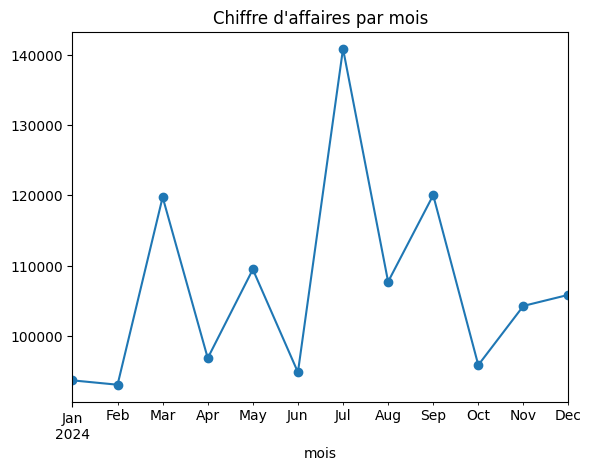

In [146]:
ca_mois.plot(kind="line", marker="o", title="Chiffre d'affaires par mois")
plt.show()

In [147]:
ca_mois_diff = ca_mois.pct_change() * 100
ca_mois_diff

mois
2024-01          NaN
2024-02    -0.660494
2024-03    28.610650
2024-04   -19.092016
2024-05    13.005306
2024-06   -13.344569
2024-07    48.429316
2024-08   -23.496978
2024-09    11.409456
2024-10   -20.100197
2024-11     8.758875
2024-12     1.509727
Freq: M, Name: chiffre_affaires, dtype: float64

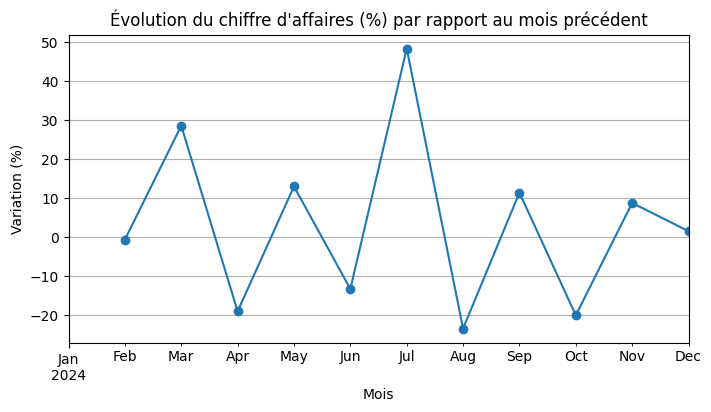

In [148]:
plt.figure(figsize=(8,4))
ca_mois_diff.plot(marker='o', linestyle='-')
plt.title("Évolution du chiffre d'affaires (%) par rapport au mois précédent")
plt.ylabel("Variation (%)")
plt.xlabel("Mois")
plt.grid(True)
plt.show()


le chiffre d'affaires a a augmenté de 91% en novembre par rapport au mois d'octobre. Remarquable évolution, tout va bien

In [149]:
ca_produit_ville = df.pivot_table(
    index="produit",
    columns="ville",
    values="chiffre_affaires",
    aggfunc="sum",
    fill_value=0
)
ca_produit_ville

ville,Bordeaux,Lille,Lyon,Marseille,Paris
produit,,,,,
Casque,15285.61,12319.07,13179.58,8766.40,10390.54
Clavier,8601.61,8823.74,9647.51,6420.48,6627.57
Ecran,34836.15,63012.01,47553.64,59951.27,41475.08
Portable,160901.68,185801.16,198643.88,140523.26,222234.21
Souris,4032.25,7557.56,5350.64,4791.96,5871.34


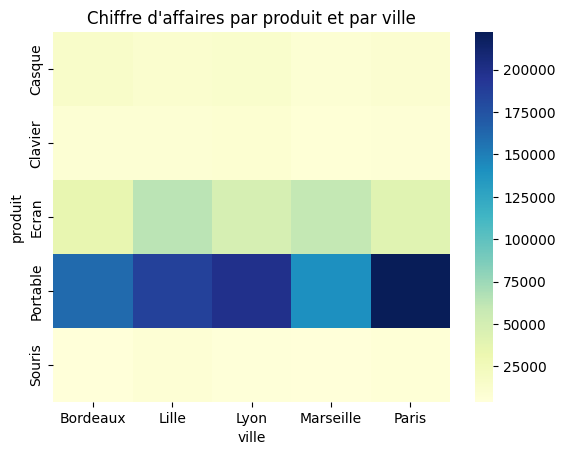

In [150]:
plt.Figure(figsize=(8,5))
sns.heatmap(ca_produit_ville, annot=False, cmap="YlGnBu")
plt.title("Chiffre d'affaires par produit et par ville")
plt.show()

## Chiffre d'affaires par produit et par ville
- Les portables constituent le plus de chiffre d'affaires dans toutes les villes, en en particulier à Lyon avec 209244.32 euros.
- La vente des ecrans, des claviers et des souris est vraiment minimale dans toutes les villes.
- les écrans sont vendus plutot à Lille, Lyon et Marseille

In [151]:
ca_produit_ville_pct = ca_produit_ville / ca_total * 100
ca_produit_ville_pct



ville,Bordeaux,Lille,Lyon,Marseille,Paris
produit,,,,,
Casque,1.191769,0.960478,1.027569,0.683488,0.810117
Clavier,0.670639,0.687958,0.752185,0.500584,0.516730
Ecran,2.716061,4.912841,3.707602,4.674205,3.233677
Portable,12.544979,14.486311,15.487616,10.956140,17.326877
Souris,0.314381,0.589238,0.417172,0.373613,0.457769


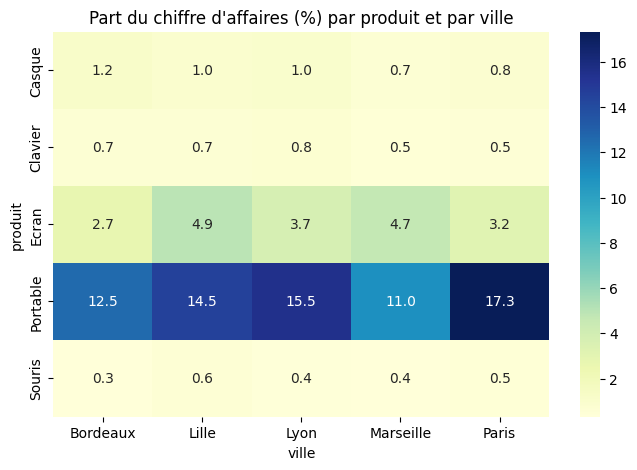

In [152]:
plt.figure(figsize=(8,5))
sns.heatmap(ca_produit_ville_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Part du chiffre d'affaires (%) par produit et par ville")
plt.show()

In [153]:
ca_ville_pct = ca_produit_ville_pct.sum(axis=0)
ca_ville_pct

ville
Bordeaux     17.437830
Lille        21.636826
Lyon         21.392144
Marseille    17.188031
Paris        22.345169
dtype: float64

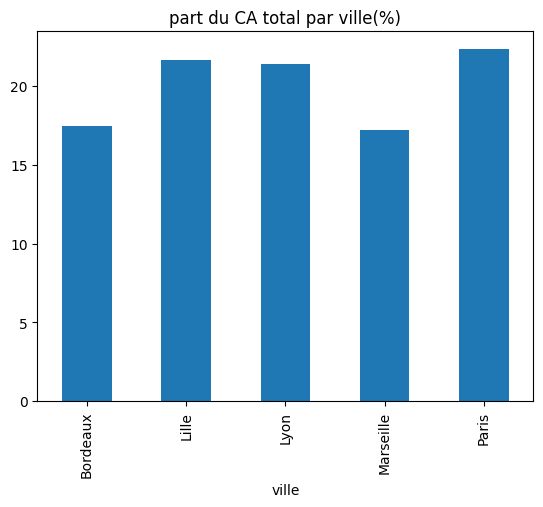

In [154]:
ca_ville_pct.plot(kind="bar", title="part du CA total par ville(%)")
plt.show()

## part du CA total par ville(%)
- Paris, Lille et Lyon génerent chacune à peu près 22% du chiffre d'affaires.
- Bordeaux et Marseille sont approximativement pareils.

### Conclusion

- Il faut augmenter la production des écrans, claviers, casques et souris dans toutes les villes.
- Il faut augmenter de manière générale la production à Paris, et Lyon car ça ce sont des métropoles et que c'est plus rapide d'augmenter le chiffre d'affaires dans ces 2 villes.
- Il faut continuer la démarche prise en Juillet, qui a permit d'augmenter le chiffre d'affaires de 48% par rapport à Juin.